In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [178]:
ts = pd.read_csv('memory_payment.csv', delimiter=';',header=0, parse_dates=[0],dayfirst=True,index_col=0, usecols=[0,2])
ts

,Value
Time,
2022-04-07 11:40:01,530.25
2022-04-07 11:39:31,265.23
2022-04-07 11:39:01,265.23
2022-04-07 11:38:31,795.86
2022-04-07 11:38:01,795.86
...,...
2022-04-07 09:32:01,760.84
2022-04-07 09:31:31,760.84
2022-04-07 09:31:01,260.99


In [179]:
tsr = ts.resample(rule='0.5T').mean()
tsr

,Value
Time,
2022-04-07 09:30:00,260.99
2022-04-07 09:30:30,260.99
2022-04-07 09:31:00,260.99
2022-04-07 09:31:30,760.84
2022-04-07 09:32:00,760.84
...,...
2022-04-07 11:38:00,795.86
2022-04-07 11:38:30,795.86
2022-04-07 11:39:00,265.23


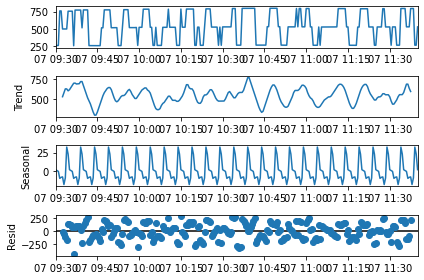

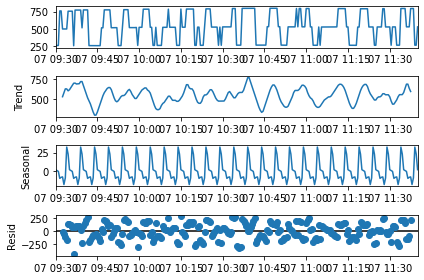

In [180]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposedTs = seasonal_decompose(tsr,model="add", period=10)
decomposedTs.plot()

In [181]:
#Split data  training e data test
train_data= tsr.iloc[50:210]
test_data=tsr.iloc[210:]
real_data=tsr.iloc[50:210]
#train_data
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2022-04-07 09:55:00 to 2022-04-07 11:14:30
Freq: 30S
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   160 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2022-04-07 11:15:00 to 2022-04-07 11:40:00
Freq: 30S
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   51 non-null     float64
dtypes: float64(1)
memory usage: 816.0 bytes


In [182]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
tsmodel = ExponentialSmoothing(train_data, trend="add",seasonal="add",seasonal_periods=20).fit()
prediction = tsmodel.forecast(100)
prediction

2022-04-07 11:15:00    492.391643
2022-04-07 11:15:30    449.539994
2022-04-07 11:16:00    449.275519
2022-04-07 11:16:30    407.658803
2022-04-07 11:17:00    528.827136
                          ...    
2022-04-07 12:02:30    414.266830
2022-04-07 12:03:00    421.313408
2022-04-07 12:03:30    487.119407
2022-04-07 12:04:00    482.789067
2022-04-07 12:04:30    476.177987
Freq: 30S, Length: 100, dtype: float64

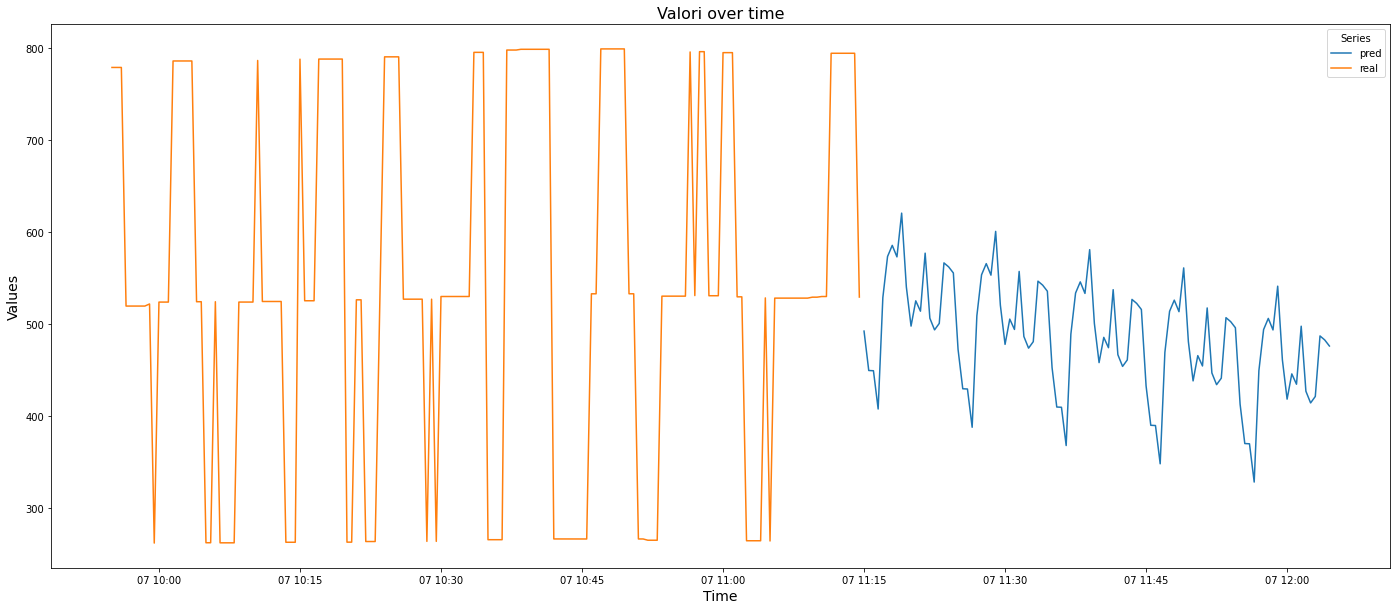

In [183]:
plt.figure(figsize=(24,10))

plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Valori over time', fontsize=16)

#plt.plot(test_data,"-",label='real')
plt.plot(prediction,"-",label = 'pred')
plt.plot(real_data,"-",label = 'real')
plt.legend(title='Series')